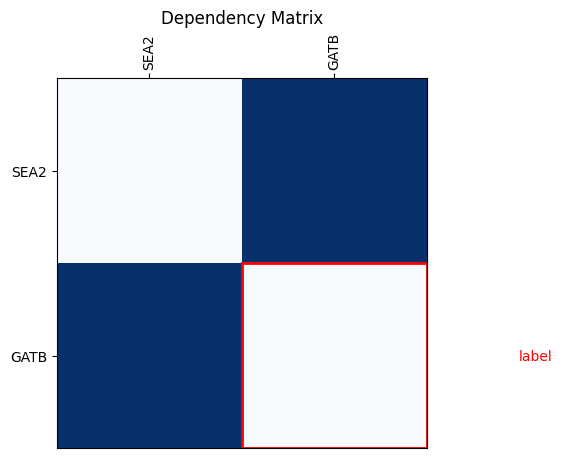

In [13]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.patches as patches


def generate_dependency_matrix(dependencies, item_order, highlight_ranges=None):
    # Create a mapping from item names to indices
    item_indices = {item: i for i, item in enumerate(item_order)}

    # Get the number of items
    num_items = len(item_order)

    # Create a matrix filled with zeros
    matrix = np.zeros((num_items, num_items))

    # Set dependencies in the matrix
    for item, dependency in dependencies:
        item_index = item_indices[item]
        dependency_indices = [item_indices[dep] for dep in dependency]
        matrix[item_index, dependency_indices] = 1
        matrix[dependency_indices, item_index] = 1

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Display the matrix of dependencies
    ax.imshow(matrix, cmap='Blues', interpolation='nearest')

    # Add labels and ticks
    ax.set_xticks(np.arange(num_items))
    ax.set_yticks(np.arange(num_items))
    ax.set_xticklabels(item_order, rotation=90)
    ax.set_yticklabels(item_order)

    # Place x-axis tick labels at the top
    ax.xaxis.tick_top()

    # Set labels and title
    #plt.xlabel('Dependent Item')
    #plt.ylabel('Dependent On')
    plt.title('Dependency Matrix')

    # Display grid
    #ax.set_xticks(np.arange(num_items + 1) - 0.5, minor=True)
    #ax.set_yticks(np.arange(num_items + 1) - 0.5, minor=True)
    #ax.grid(which="minor", color="black", linestyle='-', linewidth=2)

    # Highlight specified ranges with rectangles
    if highlight_ranges:
        for highlight_range in highlight_ranges:
            rect = patches.Rectangle(
                (highlight_range[0] - 0.5, highlight_range[1] - 0.5),
                highlight_range[2], highlight_range[3],
                linewidth=2, edgecolor='red', facecolor='none'
            )
            ax.add_patch(rect)

            # Calculate the center of the rectangle
            center_x = highlight_range[0] + highlight_range[2] / 2
            center_y = highlight_range[1] + highlight_range[3] / 2

            # Add label to the right of the plot
            label_text = f'{highlight_range[4]}'  # You can customize the label text
            ax.text(ax.get_xlim()[1] + 0.5, center_y - 0.5, label_text, ha='left', va='center', color='red')

    # Display the plot
    plt.show()

# Example dependencies with item order
dependency_data = [("SEA2", ["GATB"]), ("GATB", [])]
item_order = ["SEA2", "GATB"]
highlight_ranges = [(1, 1, 1, 1, 'label'),]


generate_dependency_matrix(dependency_data, item_order, highlight_ranges)


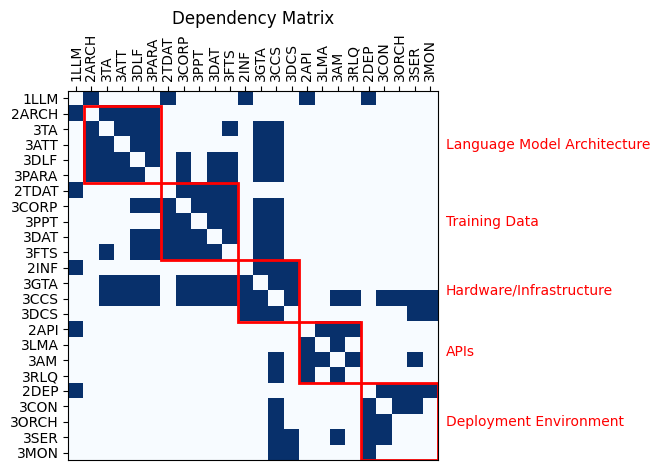

In [16]:

# Example dependencies with item order
dependency_data = [
                    # top level dependency
                    ("1LLM", ["2ARCH", "2TDAT", "2INF", "2API", "2DEP"]), 
                    # second level dependency
                    ("2ARCH", ["3TA", "3ATT", "3DLF", "3PARA"]),
                    ("2TDAT", ["3CORP", "3PPT", "3DAT", "3FTS"]),
                    ("2INF", ["3GTA", "3CCS", "3DCS"]),
                    ("2API", ["3LMA", "3AM", "3RLQ"]),
                    ("2DEP", ["3CON", "3ORCH", "3SER", "3MON"]),
                    # third level dependencies
                    ("3TA", ["3ATT", "3PARA", "3DLF", "3CCS", "3GTA"]),
                    ("3ATT", ["3PARA", "3DLF", "3CCS", "3GTA"]),
                    ("3DLF", ["3TA", "3ATT", "3PARA", "3CCS", "3GTA"]),
                    ("3PARA", ["3CORP", "3DAT", "3FTS", "3DLF", "3CCS", "3GTA"]),
                    ("3CORP", ["3PPT", "3DAT", "3FTS", "3PARA", "3DLF", "3CCS", "3GTA"]),
                    ("3PPT", ["3CORP", "3DAT", "3FTS", "3CCS", "3GTA"]),
                    ("3DAT", ["3CORP", "3PPT", "3FTS", "3PARA", "3DLF", "3CCS", "3GTA"]),
                    ("3FTS", ["3PARA", "3CORP", "3DAT", "3DLF", "3CCS", "3GTA"]),
                    ("3GTA", ["3CCS", "3DCS", "3TA", "3ATT", "3DLF", "3PARA"]),
                    ("3CCS", ["3GTA", "3DCS", "3AM", "3RLQ", "3CON", "3ORCH", "3SER", "3MON", "3ATT", "3DLF", "3PARA", "3TA"]),
                    ("3DCS", ["3GTA", "3CCS"]),
                    ("3LMA", ["3AM"]),
                    ("3AM", ["3CCS", "3LMA"]),
                    ("3RLQ", ["3CCS", "3AM"]),
                    ("3CON", ["3ORCH", "3CCS", "3SER"]),
                    ("3ORCH", ["3CCS", "3CON"]),
                    ("3SER", ["3CCS", "3CON", "3DCS"]),
                    ("3MON", ["3CCS", "3DCS"]),
                    ("3RLQ", ["3CCS", "3AM"]),  # Indirect dependency through 3AM
                    ("3SER", ["3AM", "3CON"]),  # Indirect dependency through 3CON
                    ("3CON", ["3CCS", "3ORCH"]),  # Indirect dependency through 3ORCH
                    ("3FTS", ["3DLF", "3TA"]),  # Indirect dependency through 3CORP
                    ("3SER", ["3CCS", "3CON", "3CCS"]),  # Duplicate dependency for illustration

                  ]

item_order = ordered_list = ["1LLM", 
                             "2ARCH", "3TA", "3ATT", "3DLF", "3PARA", # Language Model Architecture
                             "2TDAT", "3CORP", "3PPT", "3DAT", "3FTS",# Training Data
                             "2INF", "3GTA", "3CCS", "3DCS",          # Hardware/Infrastructure
                             "2API", "3LMA", "3AM", "3RLQ",           # APIs
                             "2DEP", "3CON", "3ORCH", "3SER", "3MON", # Deployment Environment
                             ] 

highlight_ranges = [(1, 1, 5, 5, "Language Model Architecture"), 
                    (6,6,5,5, "Training Data"), 
                    (11,11,4,4, "Hardware/Infrastructure"), 
                    (15,15,4,4, "APIs"), 
                    (19,19,5,5, "Deployment Environment")]


generate_dependency_matrix(dependency_data, item_order, highlight_ranges)
